In [6]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import medfilt
import scipy.fftpack as fft
file_path = "../Sample-Sound-Sambutan-Jokowi-Aksi-212.wav"
y, sr = librosa.load(file_path, sr=None)

In [7]:
#perform STFT to audio signal, and get the audio magnitude & phase
S_full, phase = librosa.magphase(librosa.stft(y))

In [8]:
S_full.shape

(1025, 10521)

In [9]:
#estimating noise power of the audio signal
noise_power = np.mean(S_full[:, :], axis=1)
noise_power

array([3.7802792e-01, 7.6156610e-01, 1.2847464e+00, ..., 2.1316919e-04,
       2.1404323e-04, 1.9217277e-04], dtype=float32)

In [10]:
#create a mask to identify when signal magnitude exceeds the estimated noise power
#smooth the mask using a median filter to avoid abrupt changes.
mask = S_full > noise_power[:, None]
mask = mask.astype(float)
mask = medfilt(mask, kernel_size=(1, 5))
s_clean = S_full * mask

In [32]:
S_full

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0926957e-03,
        7.4428294e-07, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0803011e-03,
        1.3516652e-06, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0451750e-03,
        2.3684920e-06, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.8566661e-05,
        9.8876581e-07, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0035973e-05,
        9.8896703e-07, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.9228606e-05,
        9.8902387e-07, 0.0000000e+00]], dtype=float32)

In [31]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
#inverse STFT to convert the cleaned magnitude data back to the time domain
y_clean = librosa.istft(s_clean * phase)

In [12]:
#save audio to wav format
sf.write("stft_filtered_6.wav", y_clean, sr)

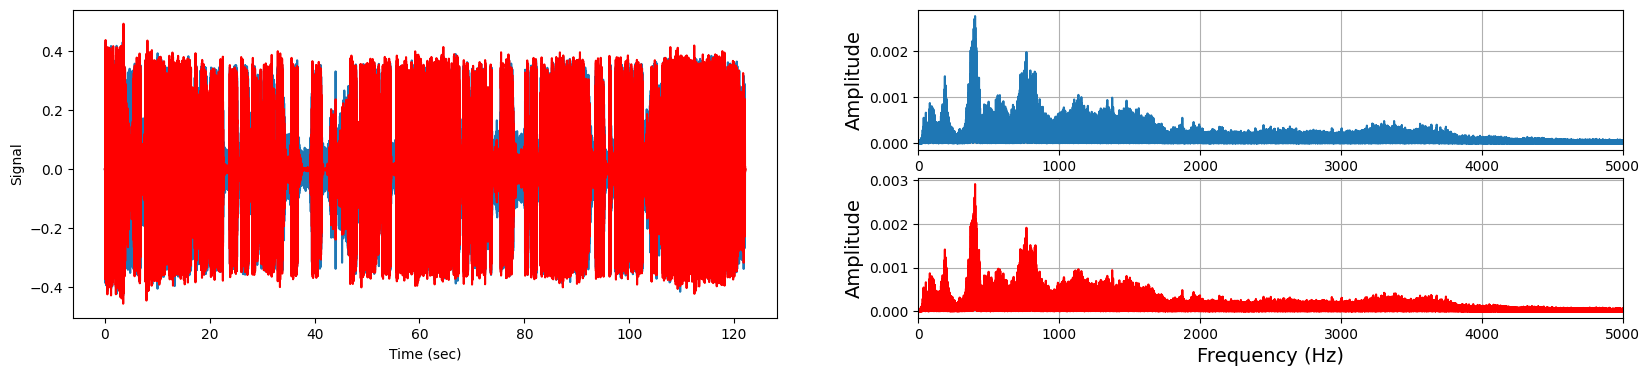

In [39]:
n = len(y)
yf = fft.fft(y)
yf_clean = fft.fft(y_clean)
xf = np.linspace(0.0, sr / 2.0, n // 2)

fig = plt.figure(figsize=(20, 4))
gs=fig.add_gridspec(2,2)

ax1=fig.add_subplot(gs[:,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,1])

t = np.array(range(0, len(y))) / sr
ax1.plot(t,y,label='Input')
ax1.plot(t,y_clean.real,label='output', color='r')
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Signal')

ax2.plot(xf, 2.0 / n * np.abs(yf[:n // 2]))
ax2.set_xlim(0, 5000)
ax2.set_xlabel('Frequency (Hz)',fontsize=14)
ax2.set_ylabel('Amplitude',fontsize=14)
ax2.grid()

ax3.plot(xf, 2.0 / n * np.abs(yf_clean[:n // 2]), color='r')
ax3.set_xlim(0, 5000)
ax3.set_xlabel('Frequency (Hz)',fontsize=14)
ax3.set_ylabel('Amplitude',fontsize=14)
ax3.grid()